---
title: Polynomial Regression
author: Alexa Dandridge
format:
    html:
        embed-resources: true
        code-line numbers: true

---
**GitHub Repository** <https://github.com/alexadandridge/Positron-Class-Week-0->

# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

In [1]:
import pandas as pd
import numpy as np
dat = pd.read_csv("https://gist.githubusercontent.com/slopp/ce3b90b9168f2f921784de84fa445651/raw/4ecf3041f0ed4913e7c230758733948bc561f434/penguins.csv")

dat.head()

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


If we want to predict bill_depth_mm, we can dummify the variables that are text and categorical, such as species, island, and sex.

Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

**Simple Linear Regression Model**

<Axes: ylabel='Frequency'>

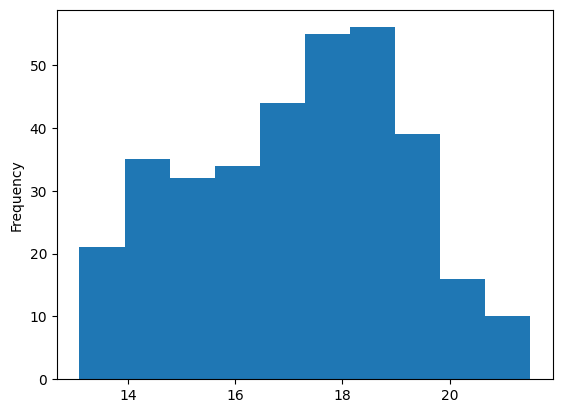

In [2]:
dat['bill_depth_mm'].plot.hist()

In [3]:
dat['bill_depth_mm'].describe()

,bill_depth_mm
count,342.000000
mean,17.151170
std,1.974793
min,13.100000
25%,15.600000
50%,17.300000
75%,18.700000
max,21.500000


<Axes: ylabel='Frequency'>

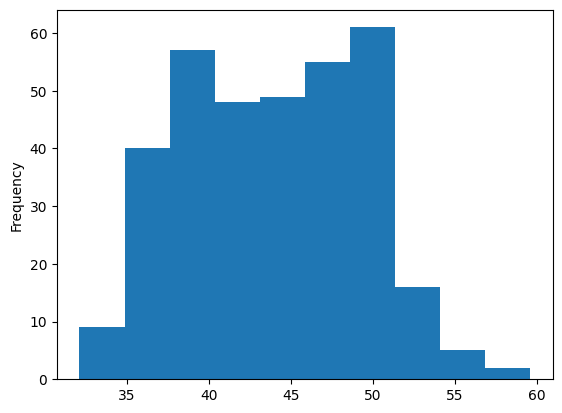

In [4]:
dat['bill_length_mm'].plot.hist()

In [5]:
dat['bill_length_mm'].describe()

,bill_length_mm
count,342.000000
mean,43.921930
std,5.459584
min,32.100000
25%,39.225000
50%,44.450000
75%,48.500000
max,59.600000


**Using scikit-learn to fit a linear regression model for predicting bill_depth_mm from bill_length_mm.**

In [6]:
# Importing LinearRegression
from sklearn.linear_model import LinearRegression

In [7]:
# Drop rows with NaN values in the relevant columns
cleaned_dat = dat.dropna()


lr_model = LinearRegression()
lr_model.fit(
    X=cleaned_dat[["bill_length_mm"]],
    y=cleaned_dat["bill_depth_mm"]
)

LinearRegression()

In [8]:
lr_model.coef_, lr_model.intercept_

(array([-0.08232675]), np.float64(20.786648668433827))

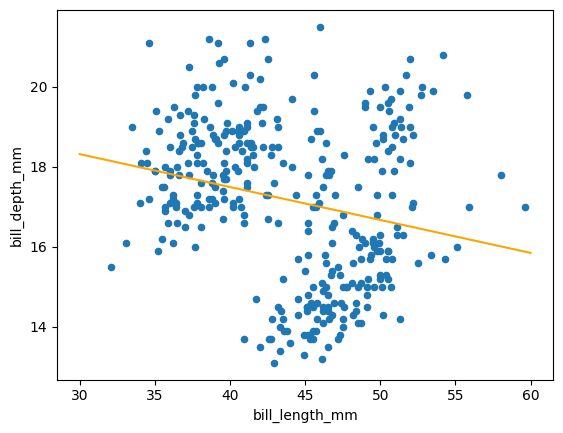

In [9]:
X_new = pd.DataFrame()
X_new["bill_length_mm"] = np.linspace(30, 60, num=1000)
y_new_ = pd.Series(
    lr_model.predict(X_new),
    index=X_new["bill_length_mm"]
)

dat.plot.scatter(x="bill_length_mm", y="bill_depth_mm")
y_new_.plot.line(c = "orange");

In [10]:
cleaned_dat["lr_predict"] = lr_model.predict(cleaned_dat[["bill_length_mm"]])
cleaned_dat.head()

/tmp/ipython-input-2277997779.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_dat["lr_predict"] = lr_model.predict(cleaned_dat[["bill_length_mm"]])


,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,lr_predict
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,17.567673
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,17.534742
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,17.468881
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,17.765257
5,6,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007,17.551207


In [11]:
df_long = cleaned_dat[["bill_length_mm", "bill_depth_mm", "lr_predict"]]
df_long = df_long.melt(id_vars=["bill_length_mm"], value_name = "bill_depth", var_name = "type")
df_long.head()

,bill_length_mm,type,bill_depth
0,39.1,bill_depth_mm,18.7
1,39.5,bill_depth_mm,17.4
2,40.3,bill_depth_mm,18.0
3,36.7,bill_depth_mm,19.3
4,39.3,bill_depth_mm,20.6


In [12]:
from plotnine import *

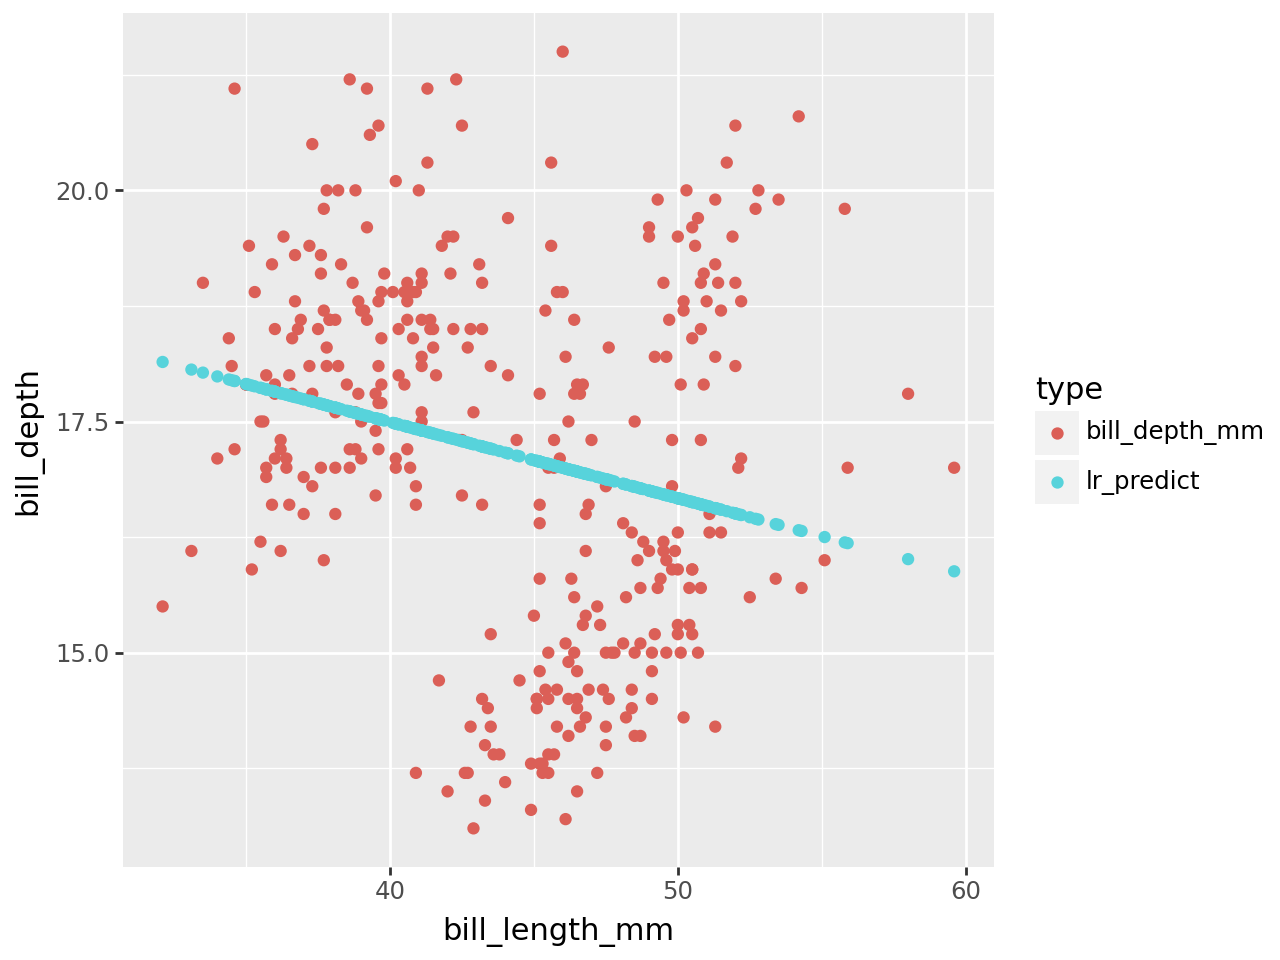

In [13]:
(ggplot(df_long,
        aes(x = "bill_length_mm",
            y = "bill_depth",
            color = "type")) +
 geom_point())

**Using scikit-learn to fit a linear regression model for predicting log of bill_depth_mm recognition from bill_length_mm.**

In [14]:
cleaned_dat["log_bill_depth"] = np.log(cleaned_dat["bill_depth_mm"])

cleaned_dat.head()

/tmp/ipython-input-2652273881.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,lr_predict,log_bill_depth
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,17.567673,2.928524
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,17.534742,2.856470
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,17.468881,2.890372
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,17.765257,2.960105
5,6,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007,17.551207,3.025291


In [15]:
log_model = LinearRegression()
log_model.fit(
    X=cleaned_dat[["bill_length_mm"]],
    y=cleaned_dat["log_bill_depth"]
)

LinearRegression()

In [16]:
log_model.coef_, log_model.intercept_

(array([-0.00499664]), np.float64(3.0559507132995445))

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

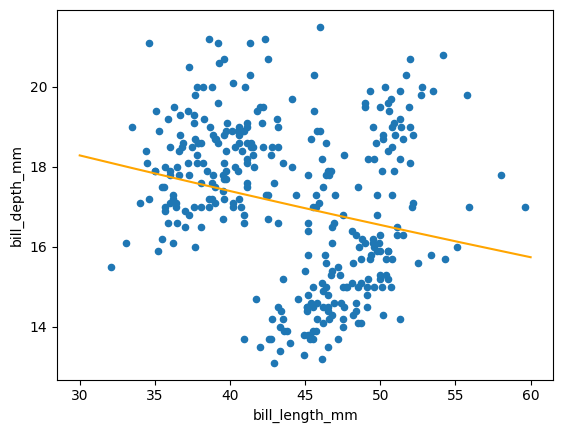

In [17]:
X_new = pd.DataFrame()
X_new["bill_length_mm"] = np.linspace(30, 60, num=1000)
y_new_ = pd.Series(
    np.exp(log_model.predict(X_new)),
    index=X_new["bill_length_mm"]
)

cleaned_dat.plot.scatter(x="bill_length_mm", y="bill_depth_mm")
y_new_.plot.line(c = "orange")

In [18]:
# Ensuring that the models where trained on no log and then log (different data)
import numpy as np

# Compare fitted coefficients
print("Linear model coefficients:", lr_model.coef_, lr_model.intercept_)
print("Log model coefficients:", log_model.coef_, log_model.intercept_)


Linear model coefficients: [-0.08232675] 20.786648668433827
Log model coefficients: [-0.00499664] 3.0559507132995445


**Using scikit-learn to fit a Quadratic (degree 2 polynomial) model for predicting bill_depth_mm from bill_length_mm.**

In [19]:
cleaned_dat["length_square"] = cleaned_dat["bill_length_mm"] ** 2

cleaned_dat.head()

/tmp/ipython-input-4195609452.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,lr_predict,log_bill_depth,length_square
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,17.567673,2.928524,1528.81
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,17.534742,2.856470,1560.25
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,17.468881,2.890372,1624.09
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,17.765257,2.960105,1346.89
5,6,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007,17.551207,3.025291,1544.49


In [20]:
square_model = LinearRegression()
square_model.fit(
    X=cleaned_dat[["bill_length_mm", "length_square"]],
    y=cleaned_dat["bill_depth_mm"]
)

LinearRegression()

In [21]:
square_model.coef_, square_model.intercept_

(array([-1.40407712,  0.01498039]), np.float64(49.49494362318971))

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

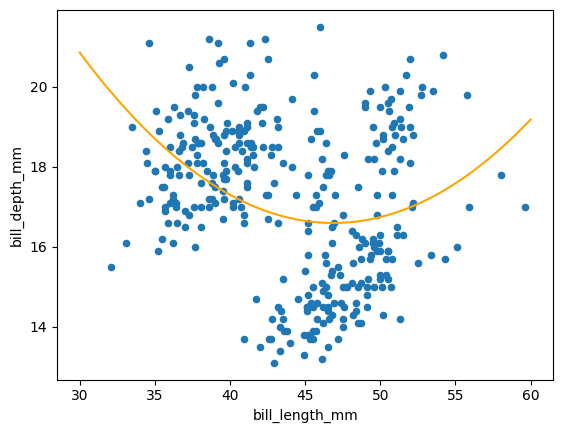

In [22]:
X_new = pd.DataFrame()
X_new["bill_length_mm"] = np.linspace(30, 60, num=1000)
X_new["length_square"] = X_new["bill_length_mm"] ** 2
y_new_ = pd.Series(
    square_model.predict(X_new),
    index=X_new["bill_length_mm"]
)

cleaned_dat.plot.scatter(x="bill_length_mm", y="bill_depth_mm")
y_new_.plot.line(c = "orange")

In [23]:
X_new.head()

,bill_length_mm,length_square
0,30.00000,900.000000
1,30.03003,901.802704
2,30.06006,903.607211
3,30.09009,905.413522
4,30.12012,907.221636


**Using scikit-learn to fit a cubic (degree 3 polynomial) model for predicting bill_depth_mm from bill_length_mm.**

In [24]:
cleaned_dat["length_cubed"] = cleaned_dat["bill_length_mm"] ** 3

cleaned_dat.head()

/tmp/ipython-input-1802395245.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,lr_predict,log_bill_depth,length_square,length_cubed
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,17.567673,2.928524,1528.81,59776.471
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,17.534742,2.856470,1560.25,61629.875
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,17.468881,2.890372,1624.09,65450.827
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,17.765257,2.960105,1346.89,49430.863
5,6,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007,17.551207,3.025291,1544.49,60698.457


In [25]:

# add all the other columns 4-10
cubed_model = LinearRegression()
cubed_model.fit(
    X=cleaned_dat[["bill_length_mm", "length_square", "length_cubed"]],#add the other columns here
    y=cleaned_dat["bill_depth_mm"]
)

LinearRegression()

In [26]:
cubed_model.coef_, cubed_model.intercept_

(array([ 6.77963360e+00, -1.68915134e-01,  1.36264370e-03]),
 np.float64(-70.53172659621545))

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

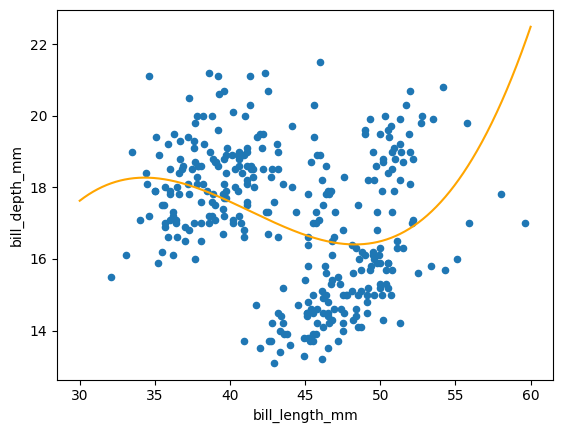

In [27]:
X_new = pd.DataFrame()
X_new["bill_length_mm"] = np.linspace(30, 60, num=1000)
X_new["length_square"] = X_new["bill_length_mm"] ** 2
X_new["length_cubed"] = X_new["bill_length_mm"] ** 3 #add all of the other 4-10 here too
y_new_ = pd.Series(
    cubed_model.predict(X_new),
    index=X_new["bill_length_mm"]
)

cleaned_dat.plot.scatter(x="bill_length_mm", y="bill_depth_mm")
y_new_.plot.line(c = "orange")

In [28]:
X_new.head()

,bill_length_mm,length_square,length_cubed
0,30.00000,900.000000,27000.000000
1,30.03003,901.802704,27081.162270
2,30.06006,903.607211,27162.487028
3,30.09009,905.413522,27243.974435
4,30.12012,907.221636,27325.624653


**Using scikit-learn to fit a degree 10 polynomial model for predicting bill_depth_mm from bill_length_mm.**

In [29]:
cleaned_dat["length_four"] = cleaned_dat["bill_length_mm"] ** 4
cleaned_dat["length_five"] = cleaned_dat["bill_length_mm"] ** 5
cleaned_dat["length_six"] = cleaned_dat["bill_length_mm"] ** 6
cleaned_dat["length_seven"] = cleaned_dat["bill_length_mm"] ** 7
cleaned_dat["length_eight"] = cleaned_dat["bill_length_mm"] ** 8
cleaned_dat["length_nine"] = cleaned_dat["bill_length_mm"] ** 9
cleaned_dat["length_ten"] = cleaned_dat["bill_length_mm"] ** 10

cleaned_dat.head()

/tmp/ipython-input-2069502800.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/tmp/ipython-input-2069502800.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/tmp/ipython-input-2069502800.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/tmp/ipython-input-206950280

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,lr_predict,log_bill_depth,length_square,length_cubed,length_four,length_five,length_six,length_seven,length_eight,length_nine,length_ten
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,17.567673,2.928524,1528.81,59776.471,2.337260e+06,9.138687e+07,3.573226e+09,1.397132e+11,5.462784e+12,2.135949e+14,8.351559e+15
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,17.534742,2.856470,1560.25,61629.875,2.434380e+06,9.615801e+07,3.798241e+09,1.500305e+11,5.926206e+12,2.340851e+14,9.246363e+15
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,17.468881,2.890372,1624.09,65450.827,2.637668e+06,1.062980e+08,4.283811e+09,1.726376e+11,6.957294e+12,2.803790e+14,1.129927e+16
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,17.765257,2.960105,1346.89,49430.863,1.814113e+06,6.657794e+07,2.443410e+09,8.967315e+10,3.291005e+12,1.207799e+14,4.432621e+15
5,6,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007,17.551207,3.025291,1544.49,60698.457,2.385449e+06,9.374816e+07,3.684303e+09,1.447931e+11,5.690369e+12,2.236315e+14,8.788717e+15


In [30]:
# add all the other columns 4-10
ten_model = LinearRegression()
ten_model.fit(
    X=cleaned_dat[["bill_length_mm", "length_square", "length_cubed", "length_four", "length_five", "length_six", "length_seven", "length_eight", "length_nine", "length_ten"]],#add the other columns here
    y=cleaned_dat["bill_depth_mm"]
)

LinearRegression()

In [31]:
ten_model.coef_, ten_model.intercept_

(array([ 9.30261877e-14,  4.30634238e-12,  1.56064756e-10,  4.04003958e-09,
         7.67183179e-08,  8.42985453e-07, -6.03511104e-08,  1.63196189e-09,
        -1.97124749e-11,  8.95411667e-14]),
 np.float64(-21.342766577098118))

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

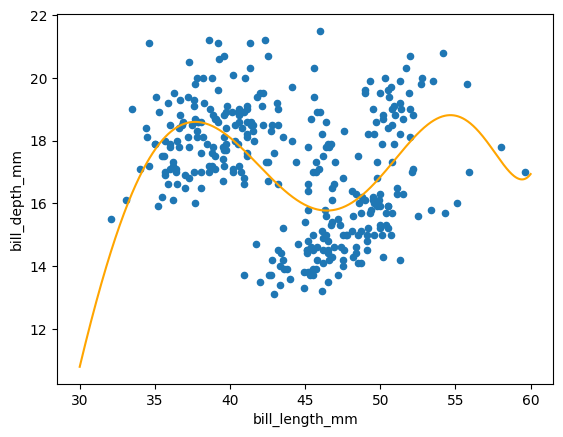

In [32]:
X_new = pd.DataFrame()
X_new["bill_length_mm"] = np.linspace(30, 60, num=1000)
X_new["length_square"] = X_new["bill_length_mm"] ** 2
X_new["length_cubed"] = X_new["bill_length_mm"] ** 3
X_new["length_four"] = X_new["bill_length_mm"] ** 4
X_new["length_five"] = X_new["bill_length_mm"] ** 5
X_new["length_six"] = X_new["bill_length_mm"] ** 6
X_new["length_seven"] = X_new["bill_length_mm"] ** 7
X_new["length_eight"] = X_new["bill_length_mm"] ** 8
X_new["length_nine"] = X_new["bill_length_mm"] ** 9
X_new["length_ten"] = X_new["bill_length_mm"] ** 10
y_new_ = pd.Series(
    ten_model.predict(X_new),
    index=X_new["bill_length_mm"]
)

cleaned_dat.plot.scatter(x="bill_length_mm", y="bill_depth_mm")
y_new_.plot.line(c = "orange")

In [33]:
X_new.head()

,bill_length_mm,length_square,length_cubed,length_four,length_five,length_six,length_seven,length_eight,length_nine,length_ten
0,30.00000,900.000000,27000.000000,810000.000000,2.430000e+07,7.290000e+08,2.187000e+10,6.561000e+11,1.968300e+13,5.904900e+14
1,30.03003,901.802704,27081.162270,813248.116228,2.442187e+07,7.333893e+08,2.202370e+10,6.613725e+11,1.986104e+13,5.964275e+14
2,30.06006,903.607211,27162.487028,816505.991436,2.454422e+07,7.378007e+08,2.217833e+10,6.666820e+11,2.004050e+13,6.024187e+14
3,30.09009,905.413522,27243.974435,819773.645150,2.466706e+07,7.422341e+08,2.233389e+10,6.720288e+11,2.022141e+13,6.084640e+14
4,30.12012,907.221636,27325.624653,823051.096918,2.479040e+07,7.466898e+08,2.249039e+10,6.774131e+11,2.040376e+13,6.145638e+14


* Are any of the models above underfitting the data? If so, which ones and how can you tell?
* Are any of thhe models above overfitting the data? If so, which ones and how can you tell?
* Which of the above models do you think fits the data best and why?

The linear model shows just a straight line, but the data on the scatterplot has some curvature/clusters. The straight line cannot show these, so it oversimplifies, which means it underfits the data.
The degree 10 polynomial seems to overfit the data because the line is very wiggly and is very close to the training data. I think the quadratic or cubed model is best. They look similar.